In this kernel, I stack my output and open kernels results, and aim high score!  
  
REF:  
https://www.kaggle.com/roydatascience/chemistry-of-best-models-1-835

## Stacking the Best Models
<pre><b>This Kernel shows how the scores can be improved using Stacking Method.
Credit Goes to the following kernels
ref:
1. https://www.kaggle.com/filemide/distance-criskiev-hyparam-cont-1-662
#2. https://www.kaggle.com/criskiev/distance-is-all-you-need-lb-1-481
3. https://www.kaggle.com/marcelotamashiro/lgb-public-kernels-plus-more-features
#4. https://www.kaggle.com/scaomath/no-memory-reduction-workflow-for-each-type-lb-1-28
5. https://www.kaggle.com/fnands/1-mpnn/output?scriptVersionId=18233432
6. https://www.kaggle.com/harshit92/fork-from-kernel-1-481
7. https://www.kaggle.com/xwxw2929/keras-neural-net-and-distance-features
8. https://www.kaggle.com/marcogorelli/criskiev-s-distances-more-estimators-groupkfold?scriptVersionId=18843561
9. https://www.kaggle.com/toshik/schnet-starter-kit
10.https://www.kaggle.com/abazdyrev/nn-w-o-skew
add1.https://www.kaggle.com/fnands/1-mpnn
add2.https://www.kaggle.com/yamqwe/deep-learning-fork-and-tweaks-lb-1-674
add3.https://www.kaggle.com/xwxw2929/keras-nn-with-multi-output
add4.https://www.kaggle.com/vandalzzz/lgb-v3-5-lb-1-657/notebook
#add5.https://www.kaggle.com/saurabh7/compact-feature-engineering-lgbm-py-version#Feature-Importances-by-Type
#add6.https://www.kaggle.com/manojprabhaakr/base-model-molecular-properties-catboost
#add7.https://www.kaggle.com/vicensgaitan/giba-r-data-table-simplefeat-cyv-interaction

</b></pre>

## Stat Stack

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

champs-scalar-coupling
pmp-submissions
stacking-models



In [2]:
concat_sub = pd.read_csv("../input/stacking-models/concat_sub.csv")
concat_sub.head(5)

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10,mol11,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3
0,4658147,3.695861,20.144223,55.943756,13.013150,16.752722,5.418903,16.333971,3.695861,14.008136,23.428907,22.673035,24.126003,6.599267,22.414471,16.752722,20.500710,8.510276,19.242008,1.602919
1,4658148,55.408562,181.403123,185.007780,185.452695,112.681038,102.854691,197.289728,55.408562,178.609375,150.373672,146.205200,139.170975,103.370956,142.809891,129.551773,151.843719,175.208596,186.417656,112.681038
2,4658149,11.794282,3.577224,1.717238,2.860661,5.626666,5.910957,6.159606,11.794282,14.079749,9.440313,9.503328,9.896583,11.236391,9.560091,5.626666,9.891783,11.947432,14.021063,4.296166
3,4658150,55.408562,181.403123,185.007780,186.291965,112.681038,102.854691,196.833797,55.408562,178.609375,150.373672,146.205200,139.170975,103.370956,142.809891,129.551773,151.843719,173.290895,186.417664,112.681038
4,4658151,3.695861,20.144230,55.943756,14.473496,16.752722,5.418903,17.863188,3.695861,14.008136,23.428907,22.673035,24.126003,6.599267,22.414471,16.752722,20.500710,8.399224,19.242008,1.602919


In [3]:
#concat_sub = concat_sub.drop(["mol14"], axis=1)

In [4]:
concat_sub.head(5)

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10,mol11,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3
0,4658147,3.695861,20.144223,55.943756,13.013150,16.752722,5.418903,16.333971,3.695861,14.008136,23.428907,22.673035,24.126003,6.599267,22.414471,16.752722,20.500710,8.510276,19.242008,1.602919
1,4658148,55.408562,181.403123,185.007780,185.452695,112.681038,102.854691,197.289728,55.408562,178.609375,150.373672,146.205200,139.170975,103.370956,142.809891,129.551773,151.843719,175.208596,186.417656,112.681038
2,4658149,11.794282,3.577224,1.717238,2.860661,5.626666,5.910957,6.159606,11.794282,14.079749,9.440313,9.503328,9.896583,11.236391,9.560091,5.626666,9.891783,11.947432,14.021063,4.296166
3,4658150,55.408562,181.403123,185.007780,186.291965,112.681038,102.854691,196.833797,55.408562,178.609375,150.373672,146.205200,139.170975,103.370956,142.809891,129.551773,151.843719,173.290895,186.417664,112.681038
4,4658151,3.695861,20.144230,55.943756,14.473496,16.752722,5.418903,17.863188,3.695861,14.008136,23.428907,22.673035,24.126003,6.599267,22.414471,16.752722,20.500710,8.399224,19.242008,1.602919


In [5]:
# check correlation
concat_sub.iloc[:,1:].corr()

,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10,mol11,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3
mol0,1.000000,0.991854,0.991853,0.991826,0.992624,0.991974,0.991851,1.000000,0.991935,0.991936,0.991938,0.991910,0.991967,0.991934,0.992622,0.991931,0.991910,0.991848,0.953004
mol1,0.991854,1.000000,0.999881,0.999833,0.999821,0.999835,0.999842,0.991854,0.999848,0.999856,0.999856,0.999838,0.999811,0.999854,0.999817,0.999850,0.999887,0.999944,0.983424
mol2,0.991853,0.999881,1.000000,0.999831,0.999817,0.999826,0.999828,0.991853,0.999842,0.999851,0.999851,0.999830,0.999805,0.999849,0.999812,0.999845,0.999874,0.999882,0.983412
mol3,0.991826,0.999833,0.999831,1.000000,0.999790,0.999803,0.999865,0.991826,0.999823,0.999834,0.999833,0.999822,0.999781,0.999831,0.999786,0.999826,0.999893,0.999829,0.983389
mol4,0.992624,0.999821,0.999817,0.999790,1.000000,0.999944,0.999814,0.992624,0.999899,0.999906,0.999906,0.999880,0.999931,0.999903,0.999978,0.999899,0.999872,0.999817,0.982639
mol5,0.991974,0.999835,0.999826,0.999803,0.999944,1.000000,0.999828,0.991974,0.999913,0.999921,0.999921,0.999898,0.999944,0.999919,0.999940,0.999914,0.999886,0.999830,0.983553
mol6,0.991851,0.999842,0.999828,0.999865,0.999814,0.999828,1.000000,0.991851,0.999844,0.999851,0.999851,0.999834,0.999804,0.999849,0.999810,0.999845,0.999902,0.999839,0.983408
mol7,1.000000,0.991854,0.991853,0.991826,0.992624,0.991974,0.991851,1.000000,0.991935,0.991936,0.991938,0.991910,0.991967,0.991934,0.992622,0.991931,0.991910,0.991848,0.953004
mol8,0.991935,0.999848,0.999842,0.999823,0.999899,0.999913,0.999844,0.991935,1.000000,0.999970,0.999969,0.999947,0.999892,0.999966,0.999896,0.999961,0.999908,0.999843,0.983495
mol9,0.991936,0.999856,0.999851,0.999834,0.999906,0.999921,0.999851,0.991936,0.999970,1.000000,0.999990,0.999970,0.999900,0.999985,0.999902,0.999980,0.999918,0.999851,0.983511


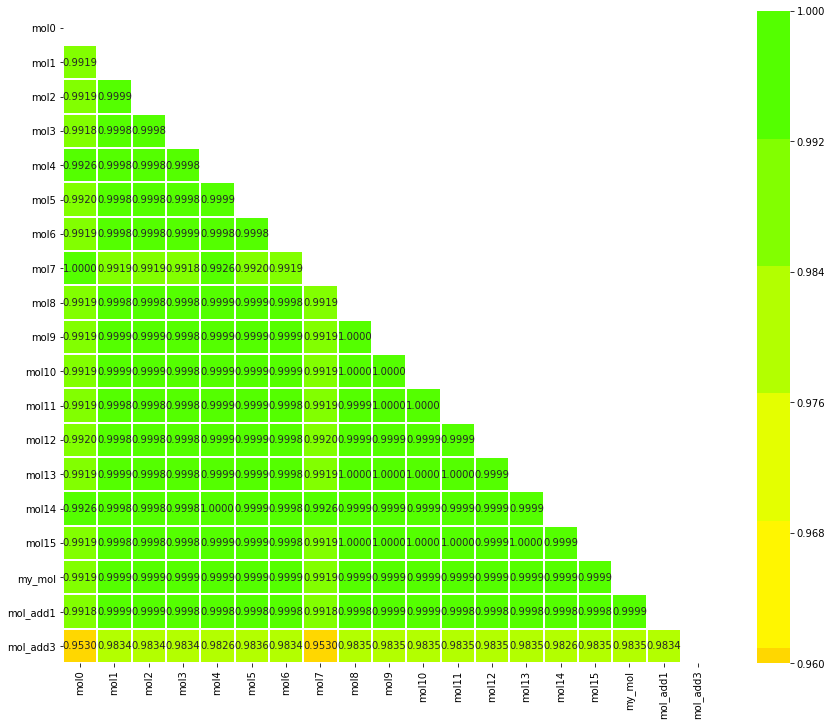

In [6]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [7]:
# get the data fields ready for stacking
#concat_sub['m_max'] = concat_sub.iloc[:, 1:21].max(axis=1)
#concat_sub['m_min'] = concat_sub.iloc[:, 1:21].min(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)
#concat_sub['m_mean'] = concat_sub.iloc[:, 1:21].mean(axis=1)

In [8]:
pd.options.display.max_columns = None
concat_sub.head(40)

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10,mol11,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3,m_median
0,4658147,3.695861,20.144223,55.943756,13.013150,16.752722,5.418903,16.333971,3.695861,14.008136,23.428907,22.673035,24.126003,6.599267,22.414471,16.752722,20.500710,8.510276,19.242008,1.602919,16.752722
1,4658148,55.408562,181.403123,185.007780,185.452695,112.681038,102.854691,197.289728,55.408562,178.609375,150.373672,146.205200,139.170975,103.370956,142.809891,129.551773,151.843719,175.208596,186.417656,112.681038,146.205200
2,4658149,11.794282,3.577224,1.717238,2.860661,5.626666,5.910957,6.159606,11.794282,14.079749,9.440313,9.503328,9.896583,11.236391,9.560091,5.626666,9.891783,11.947432,14.021063,4.296166,9.503328
3,4658150,55.408562,181.403123,185.007780,186.291965,112.681038,102.854691,196.833797,55.408562,178.609375,150.373672,146.205200,139.170975,103.370956,142.809891,129.551773,151.843719,173.290895,186.417664,112.681038,146.205200
4,4658151,3.695861,20.144230,55.943756,14.473496,16.752722,5.418903,17.863188,3.695861,14.008136,23.428907,22.673035,24.126003,6.599267,22.414471,16.752722,20.500710,8.399224,19.242008,1.602919,16.752722
5,4658152,84.886185,90.869733,92.056030,91.026035,85.316986,83.566948,90.829111,84.886185,92.043877,91.970360,91.626915,92.646301,84.158707,91.488388,82.277916,92.437202,91.179521,91.277396,85.316986,91.026035
6,4658153,2.175280,2.321565,2.406619,2.739388,1.578010,2.133362,2.197705,2.175280,2.018941,2.612546,2.746282,2.797993,1.908758,2.440442,1.578010,2.753030,2.572754,2.163452,1.949430,2.197705
7,4658154,-9.569845,-7.428432,-7.956534,-7.778613,-9.356209,-9.036317,-7.827742,-9.569845,-7.468624,-7.507672,-7.511728,-7.558826,-9.631174,-7.526279,-9.356209,-7.472149,-7.606773,-7.642238,-11.265220,-7.778613
8,4658155,-10.596900,-9.907978,-9.950280,-9.400369,-9.920478,-10.134884,-9.426288,-10.596900,-9.602962,-9.597714,-9.589906,-9.637208,-10.847205,-9.623013,-9.920478,-9.576653,-9.598382,-9.627069,-10.356153,-9.637208
9,4658156,84.886467,90.843607,92.062430,91.010413,85.319260,83.571823,91.480874,84.886467,92.039444,91.941666,91.629890,92.661949,84.161926,91.492561,82.279091,92.451614,90.683237,91.277786,85.319260,91.010413


# Consider next submission  
Above m_median's score is -1.908.  
mol11 is almost same dataset and near model from mol13, so I drop mol11 data from stacking models. (mol13 is better score)   
In addition, mol0 and mol7 is completely same data(corr=1.00000), so drop mol7.  
mol3 is original model of my_mol, so drop.
And add strong kernels to stacking model, 

In [9]:
concat_sub2 = concat_sub.drop(["m_median", "mol11", "mol7", "mol3"], axis=1)
concat_sub2.head(5)

,id,mol0,mol1,mol2,mol4,mol5,mol6,mol8,mol9,mol10,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3
0,4658147,3.695861,20.144223,55.943756,16.752722,5.418903,16.333971,14.008136,23.428907,22.673035,6.599267,22.414471,16.752722,20.500710,8.510276,19.242008,1.602919
1,4658148,55.408562,181.403123,185.007780,112.681038,102.854691,197.289728,178.609375,150.373672,146.205200,103.370956,142.809891,129.551773,151.843719,175.208596,186.417656,112.681038
2,4658149,11.794282,3.577224,1.717238,5.626666,5.910957,6.159606,14.079749,9.440313,9.503328,11.236391,9.560091,5.626666,9.891783,11.947432,14.021063,4.296166
3,4658150,55.408562,181.403123,185.007780,112.681038,102.854691,196.833797,178.609375,150.373672,146.205200,103.370956,142.809891,129.551773,151.843719,173.290895,186.417664,112.681038
4,4658151,3.695861,20.144230,55.943756,16.752722,5.418903,17.863188,14.008136,23.428907,22.673035,6.599267,22.414471,16.752722,20.500710,8.399224,19.242008,1.602919


In [10]:
my_mol2 = pd.read_csv("../input/pmp-submissions/submission_lgb_dart1-1.592.csv")
my_mol3 = pd.read_csv("../input/pmp-submissions/submission_lgb_dart2_400_12-1.847.csv")
my_mol4 = pd.read_csv("../input/pmp-submissions/submission_lgb_gbdt1_360_9-1.747.csv")
my_mol5 = pd.read_csv("../input/pmp-submissions/submission_lgb_gbdt2_ 400_12-1.816.csv")
my_mol6 = pd.read_csv("../input/pmp-submissions/submission_lgb_gbdt3dipole.csv")
my_mol7 = pd.read_csv("../input/pmp-submissions/submission_lgb_goss1_800_12.csv")
my_mol8 = pd.read_csv("../input/pmp-submissions/submission_lgb_goss2_160_12dipole.csv")

In [11]:
concat_sub2["my_mol2"] = my_mol2["scalar_coupling_constant"]
concat_sub2["my_mol3"] = my_mol3["scalar_coupling_constant"]
concat_sub2["my_mol4"] = my_mol4["scalar_coupling_constant"]
concat_sub2["my_mol5"] = my_mol5["scalar_coupling_constant"]
concat_sub2["my_mol6"] = my_mol6["scalar_coupling_constant"]
concat_sub2["my_mol7"] = my_mol7["scalar_coupling_constant"]
concat_sub2["my_mol8"] = my_mol8["scalar_coupling_constant"]

In [12]:
# check correlation
concat_sub2.iloc[:,1:].corr()

,mol0,mol1,mol2,mol4,mol5,mol6,mol8,mol9,mol10,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3,my_mol2,my_mol3,my_mol4,my_mol5,my_mol6,my_mol7,my_mol8
mol0,1.000000,0.991854,0.991853,0.992624,0.991974,0.991851,0.991935,0.991936,0.991938,0.991967,0.991934,0.992622,0.991931,0.991910,0.991848,0.953004,0.991919,0.991935,0.991927,0.991929,0.991924,0.991928,0.991922
mol1,0.991854,1.000000,0.999881,0.999821,0.999835,0.999842,0.999848,0.999856,0.999856,0.999811,0.999854,0.999817,0.999850,0.999887,0.999944,0.983424,0.999890,0.999894,0.999884,0.999888,0.999885,0.999886,0.999888
mol2,0.991853,0.999881,1.000000,0.999817,0.999826,0.999828,0.999842,0.999851,0.999851,0.999805,0.999849,0.999812,0.999845,0.999874,0.999882,0.983412,0.999872,0.999883,0.999872,0.999877,0.999872,0.999875,0.999875
mol4,0.992624,0.999821,0.999817,1.000000,0.999944,0.999814,0.999899,0.999906,0.999906,0.999931,0.999903,0.999978,0.999899,0.999872,0.999817,0.982639,0.999883,0.999899,0.999888,0.999893,0.999887,0.999891,0.999886
mol5,0.991974,0.999835,0.999826,0.999944,1.000000,0.999828,0.999913,0.999921,0.999921,0.999944,0.999919,0.999940,0.999914,0.999886,0.999830,0.983553,0.999898,0.999913,0.999902,0.999906,0.999900,0.999904,0.999900
mol6,0.991851,0.999842,0.999828,0.999814,0.999828,1.000000,0.999844,0.999851,0.999851,0.999804,0.999849,0.999810,0.999845,0.999902,0.999839,0.983408,0.999889,0.999893,0.999883,0.999887,0.999885,0.999886,0.999886
mol8,0.991935,0.999848,0.999842,0.999899,0.999913,0.999844,1.000000,0.999970,0.999969,0.999892,0.999966,0.999896,0.999961,0.999908,0.999843,0.983495,0.999924,0.999936,0.999924,0.999930,0.999925,0.999928,0.999924
mol9,0.991936,0.999856,0.999851,0.999906,0.999921,0.999851,0.999970,1.000000,0.999990,0.999900,0.999985,0.999902,0.999980,0.999918,0.999851,0.983511,0.999934,0.999944,0.999933,0.999938,0.999933,0.999936,0.999933
mol10,0.991938,0.999856,0.999851,0.999906,0.999921,0.999851,0.999969,0.999990,1.000000,0.999900,0.999987,0.999902,0.999981,0.999917,0.999851,0.983509,0.999934,0.999944,0.999933,0.999937,0.999933,0.999935,0.999933
mol12,0.991967,0.999811,0.999805,0.999931,0.999944,0.999804,0.999892,0.999900,0.999900,1.000000,0.999897,0.999931,0.999893,0.999863,0.999806,0.983536,0.999875,0.999890,0.999878,0.999883,0.999878,0.999880,0.999877


In [13]:
concat_sub2.shape

(2505542, 24)

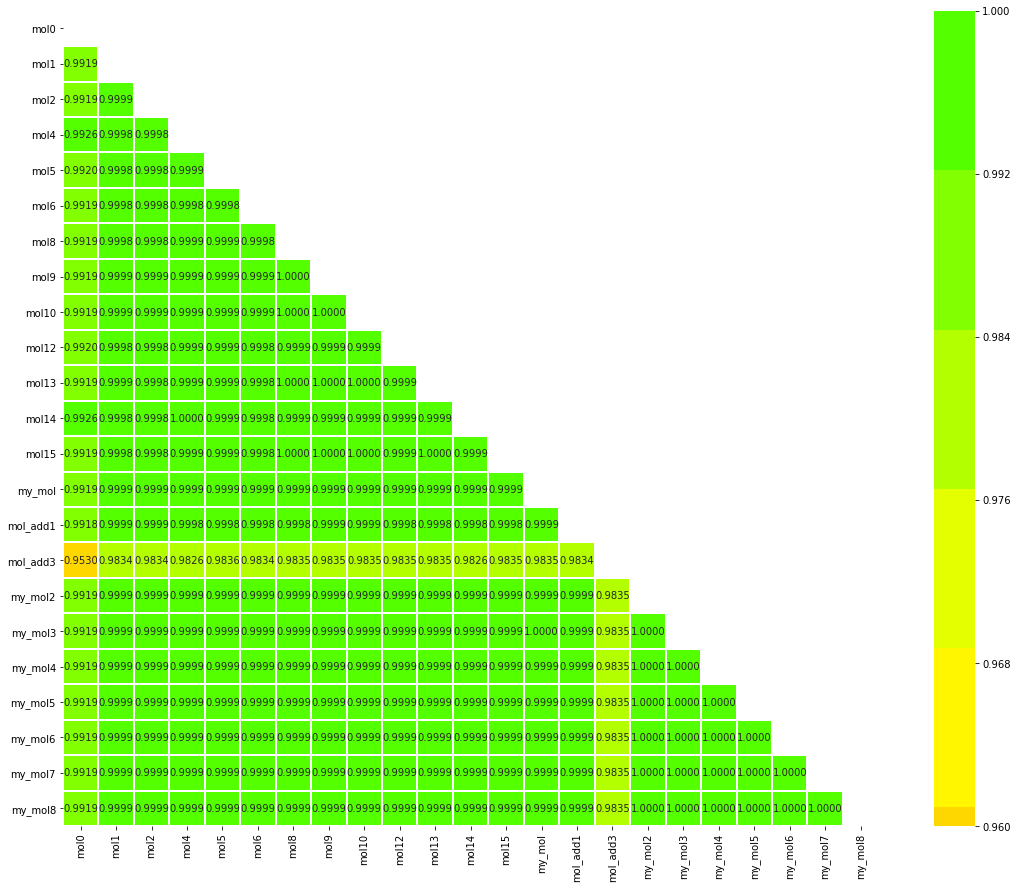

In [14]:
corr = concat_sub2.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [15]:
concat_sub2['m_median'] = concat_sub2.iloc[:, 1:].median(axis=1)

In [16]:
concat_sub2[::10].head(30)

,id,mol0,mol1,mol2,mol4,mol5,mol6,mol8,mol9,mol10,mol12,mol13,mol14,mol15,my_mol,mol_add1,mol_add3,my_mol2,my_mol3,my_mol4,my_mol5,my_mol6,my_mol7,my_mol8,m_median
0,4658147,3.695861,20.144223,55.943756,16.752722,5.418903,16.333971,14.008136,23.428907,22.673035,6.599267,22.414471,16.752722,20.500710,8.510276,19.242008,1.602919,19.173235,18.812950,19.907318,20.511042,19.834240,19.946781,20.332125,19.242008
10,4658157,2.175804,2.216990,2.411416,1.577107,2.135070,1.971498,2.058747,2.612559,2.764879,1.901623,2.452314,1.577107,2.769588,2.594111,2.375246,1.948791,2.536746,2.605736,2.547166,2.421115,2.700557,2.449751,2.536746,2.421115
20,4658167,-10.598201,-9.876406,-9.952885,-9.921513,-10.135568,-9.604440,-9.606075,-9.597111,-9.591513,-10.848973,-9.627444,-9.921513,-9.574108,-9.640712,-9.703305,-10.357151,-9.379354,-9.327713,-9.934412,-9.730618,-9.858002,-9.684887,-10.069584,-9.730618
30,4658177,6.666415,3.890726,4.204590,6.930783,5.343441,3.837946,4.095771,3.614466,3.575827,5.499659,3.457217,6.930783,3.585821,3.422539,3.733303,4.733122,3.732215,3.620878,3.930548,3.898886,3.918184,3.823010,3.781805,3.890726
40,4658187,-0.135287,-1.289745,-1.058592,-0.458935,-1.054274,-1.583192,-1.048625,-1.052056,-1.039952,-0.983889,-1.073154,-0.458935,-1.065932,-0.711588,-1.127314,0.079005,-0.583786,-0.669529,-0.393399,-1.056315,-0.935335,-1.136212,-1.359796,-1.048625
50,4658197,-0.132646,-1.288868,-1.057952,-0.457166,-1.053103,-1.007501,-1.049971,-1.053476,-1.035067,-0.982565,-1.075463,-0.457166,-1.064989,-0.540153,-1.126301,0.078466,-0.579708,-0.658690,-0.385713,-1.060781,-0.935415,-1.130802,-1.342039,-1.035067
60,4658207,54.195210,51.832426,50.929380,53.741055,52.823086,51.908999,51.899113,51.830296,51.914085,54.716358,51.782047,55.524113,51.854671,51.287971,51.189547,53.741055,51.360703,50.743862,51.382504,51.696743,51.568943,51.470325,50.970055,51.830296
70,4658217,80.226151,79.497113,79.349525,79.738747,80.018097,79.626111,79.549866,79.763542,79.630684,79.711754,79.644775,80.467827,79.934738,79.987569,79.534434,79.738747,79.579552,79.478844,79.423607,79.690880,79.500046,79.665756,79.293297,79.644775
80,4658227,3.774883,3.576082,3.725625,3.745791,3.760620,3.793820,3.721522,3.681254,3.692989,3.708199,3.695129,3.745791,3.629335,3.681973,3.410619,3.791964,3.739084,3.680918,3.754501,3.728810,3.704068,3.684869,3.730571,3.721522
90,4658237,2.272899,1.771911,1.949818,2.209286,2.160803,2.303597,2.118158,2.176725,2.146964,2.231985,2.156556,2.209286,2.152470,2.131525,1.689445,2.191642,2.152271,2.111735,2.090092,2.106751,2.027132,1.931620,1.994089,2.146964


In [17]:
#concat_sub3 = concat_sub2.drop(["mol0","mol15","mol6","mol10","mol13","mol_add1","mol8"], axis=1)
#concat_sub3 = concat_sub2[["id",
#                           "my_mol","my_mol2","my_mol3","my_mol4","my_mol5","my_mol6","my_mol7","my_mol8", #GBM
#                           "mol1","mol2", #GCNN
#                           "mol_add3","mol14","mol0","mol5" #DNN
#                           ]]

In [18]:
#concat_sub3['m_median'] = concat_sub3.iloc[:, 1:].median(axis=1)

In [19]:
#concat_sub3.head(30)

Plan memo  
1. use simple m_median (revision up version)  
#->all data median  
#->use only high score data median which are over -1.5.  
2. use regression model of each columns weight(objective:score, features: each columns weights)  
#->use original score weight  

In [20]:
#score_data =pd.DataFrame({"name":["mol0","mol1","mol2","mol3","mol4","mol5","mol6","mol7","mol8","mol9","mol10","mol11","mol12","my_mol","mol_add1","mol_add2","mol_add3","mol_add4","mol_add5","mol_add6","mol_add7"],
#                          "score": [-1.679,-1.286,-1.327,-1.302,-1.681,-1.648,-1.415,-1.667,-1.662,-1.481,-1.619,-1.643,-1.618,-1.594,-1.281,-1.674,-1.610,-1.657, -1.144, -1.131, -1.204]})

In [21]:
#score_data.score.sum()

In [22]:
#score_data["score_weight"] = score_data["score"]/(-31.32299)
#score_data.head(20)

In [23]:
#weight=score_data.T

#when change weight update "weight" row.
#weight.head(5)

In [24]:
#weight.iloc[2,20]

In [25]:
#concat_sub.mol0

In [26]:
#concat_sub["score_weight"] =concat_sub.mol0*weight.iloc[2,0]+concat_sub.mol1*weight.iloc[2,1]+concat_sub.mol2*weight.iloc[2,2]+concat_sub.mol3*weight.iloc[2,3]+concat_sub.mol4*weight.iloc[2,4]+concat_sub.mol5*weight.iloc[2,5]+concat_sub.mol6*weight.iloc[2,6]+concat_sub.mol7*weight.iloc[2,7]+concat_sub.mol8*weight.iloc[2,8]+concat_sub.mol9*weight.iloc[2,9]+concat_sub.mol10*weight.iloc[2,10]+concat_sub.mol11*weight.iloc[2,11]+concat_sub.mol12*weight.iloc[2,12]+concat_sub.my_mol*weight.iloc[2,13]+concat_sub.mol_add1*weight.iloc[2,14]+concat_sub.mol_add2*weight.iloc[2,15]+concat_sub.mol_add3*weight.iloc[2,16]+concat_sub.mol_add4*weight.iloc[2,17]+concat_sub.mol_add4*weight.iloc[2,18]+concat_sub.mol_add4*weight.iloc[2,19]+concat_sub.mol_add4*weight.iloc[2,20]

In [27]:
#concat_sub.head(5)

In [28]:
#high_score_data =pd.DataFrame({"name":["mol0","mol1","mol2","mol3","mol4","mol5","mol6","mol7","mol8","mol9","mol10","mol11","mol12","my_mol","mol_add1","mol_add2","mol_add3","mol_add4","mol_add5","mol_add6","mol_add7"],
#                          "score": [-1.679,0,0,0,-1.681,-1.648,0,-1.667,-1.662,0,-1.619,-1.643,-1.618,-1.594,0,-1.674,-1.610,-1.657,0 ,0 ,0]})
#high_score_data.score.sum()

In [29]:
#high_score_data["high_score_weight"] = high_score_data["score"]/(-19.752)
#high_score_data.head(20)

In [30]:
#weight=high_score_data.T

#when change weight update "weight" row.
#weight.head(5)

In [31]:
#concat_sub["high_score_weight"] =concat_sub.mol0*weight.iloc[2,0]+concat_sub.mol1*weight.iloc[2,1]+concat_sub.mol2*weight.iloc[2,2]+concat_sub.mol3*weight.iloc[2,3]+concat_sub.mol4*weight.iloc[2,4]+concat_sub.mol5*weight.iloc[2,5]+concat_sub.mol6*weight.iloc[2,6]+concat_sub.mol7*weight.iloc[2,7]+concat_sub.mol8*weight.iloc[2,8]+concat_sub.mol9*weight.iloc[2,9]+concat_sub.mol10*weight.iloc[2,10]+concat_sub.mol11*weight.iloc[2,11]+concat_sub.mol12*weight.iloc[2,12]+concat_sub.my_mol*weight.iloc[2,13]+concat_sub.mol_add1*weight.iloc[2,14]+concat_sub.mol_add2*weight.iloc[2,15]+concat_sub.mol_add3*weight.iloc[2,16]+concat_sub.mol_add4*weight.iloc[2,17]

In [32]:
#concat_sub.head(5)

In [33]:
#Prepare high score data median
#Pick high score data
#concat_sub2=concat_sub.loc[:,["id","mol0","mol4","mol5","mol7","mol8","mol10","mol11","mol12","my_mol","mol_add2","mol_add3","mol_add4"]]
#concat_sub2['high_score_median'] = concat_sub2.iloc[:, 1:18].median(axis=1)
#concat_sub2.head(5)

In [34]:
#Output
#concat_sub2['scalar_coupling_constant'] = concat_sub2['high_score_median']
#concat_sub2[['id', 'scalar_coupling_constant']].to_csv('stack_high_score_median.csv', 
#                                        index=False, float_format='%.6f')

In [35]:
#concat_sub['scalar_coupling_constant'] = concat_sub['score_weight']
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('score_weight.csv', 
#                                        index=False, float_format='%.6f')

In [36]:
concat_sub2['scalar_coupling_constant'] = concat_sub2['m_median']
concat_sub2[['id', 'scalar_coupling_constant']].to_csv('m_median_1.csv', 
                                        index=False, float_format='%.6f')

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Mean Stacking

In [37]:
#rank = np.tril(concat_sub.iloc[:,1:ncol].corr().values,-1)
#m_gmean = 0
#n = 8
#while rank.max()>0:
#    mx = np.unravel_index(rank.argmax(), rank.shape)
#    m_gmean += n*(np.log(concat_sub.iloc[:, mx[0]+1]) + np.log(concat_sub.iloc[:, mx[1]+1]))/2
#    rank[mx] = 0
#    n += 1

In [38]:
#concat_sub['m_mean'] = np.exp(m_gmean/(n-1)**2)

In [39]:
#concat_sub.head(5)

In [40]:
#concat_sub['scalar_coupling_constant'] = concat_sub['m_mean']
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_mean.csv', 
#                                        index=False, float_format='%.6f')

# Median Stacking

In [41]:
#concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_median.csv', 
#                                        index=False, float_format='%.6f')

In [42]:
#concat_sub.head(5)

# Pushout + Median Stacking
>* Pushout strategy is bit aggresive

In [43]:
#concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 1, 
#                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
#                                             0, concat_sub['m_median']))
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_pushout_median.csv', 
#                                        index=False, float_format='%.6f')

In [44]:
#concat_sub.head(5)

# MinMax + Mean Stacking
>* MinMax seems more gentle and it outperforms the previous one

In [45]:
#concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
#                                    concat_sub['m_max'], 
#                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
#                                             concat_sub['m_min'], 
#                                             concat_sub['m_mean']))
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_minmax_mean.csv', 
#                                        index=False, float_format='%.6f')

In [46]:
#concat_sub.head(20)

# MinMax + Median Stacking

In [47]:
#concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
#                                    concat_sub['m_max'], 
#                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
#                                             concat_sub['m_min'], 
#                                             concat_sub['m_median']))
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_minmax_median.csv', 
#                                        index=False, float_format='%.6f')

In [48]:
#concat_sub.head(20)

## Averaging Ranks

In [49]:
#concat_sub['scalar_coupling_constant'] = concat_sub['mol0'].rank(method ='min') + concat_sub['mol1'].rank(method ='min') + concat_sub['mol2'].rank(method ='min') 
#concat_sub['scalar_coupling_constant'] = (concat_sub['scalar_coupling_constant']-concat_sub['scalar_coupling_constant'].min())/(concat_sub['scalar_coupling_constant'].max() - concat_sub['scalar_coupling_constant'].min())
#concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_rank.csv', index=False, float_format='%.8f')

In [50]:
#concat_sub.head(5)

Best Results : Stack Median

# Blending Approach

In [51]:
#one = pd.read_csv('../input/chemistry-models/submission-1.619.csv')
#two = pd.read_csv('../input/chemistry-models/submission-1.643.csv')
#three = pd.read_csv('../input/chemistry-models/submission-1.662.csv')

#submission = pd.DataFrame()
#submission['id'] = one.id
#submission['scalar_coupling_constant'] = (0.65*three.scalar_coupling_constant) + (0.25*two.scalar_coupling_constant) + (0.10*one.scalar_coupling_constant)

#submission.to_csv('Aggblender.csv', index=False)